<h1 style="text-align: center;"><b>Titanic🛳️</b> </h1>             

#  🪼 Import Libraries & Load Data

In this step, we import all the necessary libraries for our Titanic ML project and load the datasets.  
We'll use:
- **pandas** for data handling  
- **numpy** for numerical operations  
- **matplotlib** & **seaborn** for visualization  
- **scikit-learn** for machine learning  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading Dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

# Display first few rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore Data

Before cleaning or modeling, lets understand the dataset.  
- Check column names and data types (`.info()`)
- See basic statistics (`.describe()`)
- Identify missing values
- Get an idea of categorical vs numerical columns

In [9]:
print("Basic Info")
train.info()

Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Summary statistics for numerical columns
print("\n📈 Summary Statistics:\n")
display(train.describe())

# Check for missing values in each column
print("\n🚨 Missing Values:\n")
print(train.isnull().sum())

# View the shape of the dataset (rows, columns)
print("\n🧾 Shape of Dataset:", train.shape)

# Show unique values in some categorical columns for context
print("\n🪪 Unique values in 'Sex':", train['Sex'].unique())
print("🧭 Unique values in 'Embarked':", train['Embarked'].unique())


📈 Summary Statistics:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



🚨 Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

🧾 Shape of Dataset: (891, 12)

🪪 Unique values in 'Sex': ['male' 'female']
🧭 Unique values in 'Embarked': ['S' 'C' 'Q' nan]


# 🧹 Clean Data

Now that we understand the dataset, let's clean it up.

We'll:
- Fill missing values:
  - `Age` → use the median (since it’s numerical)
  - `Embarked` → use the most common value (mode)
- Drop columns that aren't useful for prediction:
  - `Cabin` (too many missing)
  - `Ticket` (not meaningful)
  - `Name` (we'll ignore names for simplicity)

In [11]:
# Copy the dataset to keep original safe
df = train.copy()

# Fill missing Age values with the median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked values with the mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop columns that are not useful
df.drop(columns=["Cabin", "Ticket", "Name"], inplace=True)

# Check if any missing values remain
print(" Remaining Missing Values:\n")
print(df.isnull().sum())

# Display first few rows after cleaning
df.head()

 Remaining Missing Values:

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


/var/folders/f3/ny_qtwdj1cb_cdrm5xqb0w3h0000gn/T/ipykernel_40375/4034462386.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/var/folders/f3/ny_qtwdj1cb_cdrm5xqb0w3h0000gn/T/ipykernel_40375/4034462386.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


---
# EDA - extensive


Summary Statistics for Numerical Features:
              Age        Fare       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000
mean    29.361582   32.204208    0.523008    0.381594
std     13.019697   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     35.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


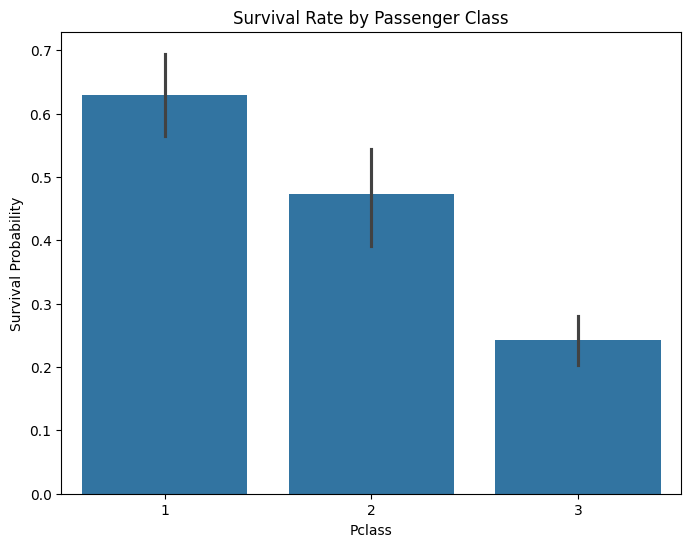


Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


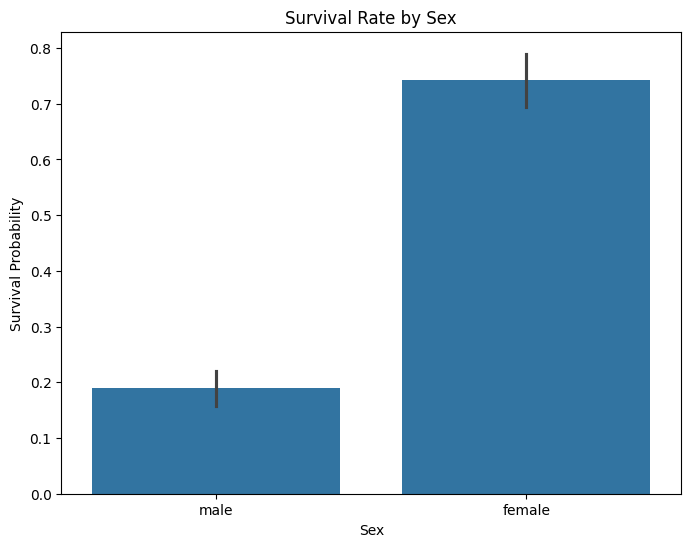


Survival Rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


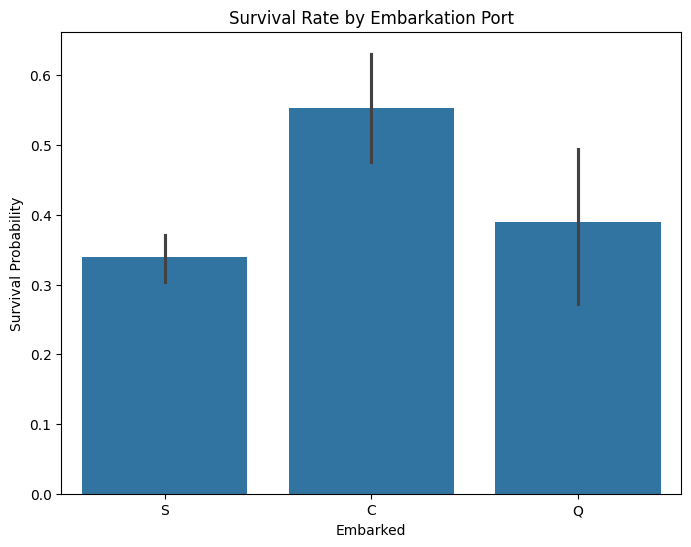

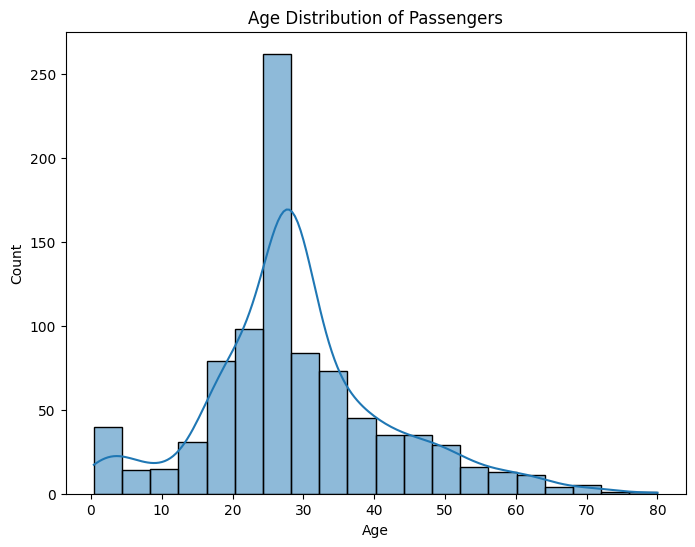

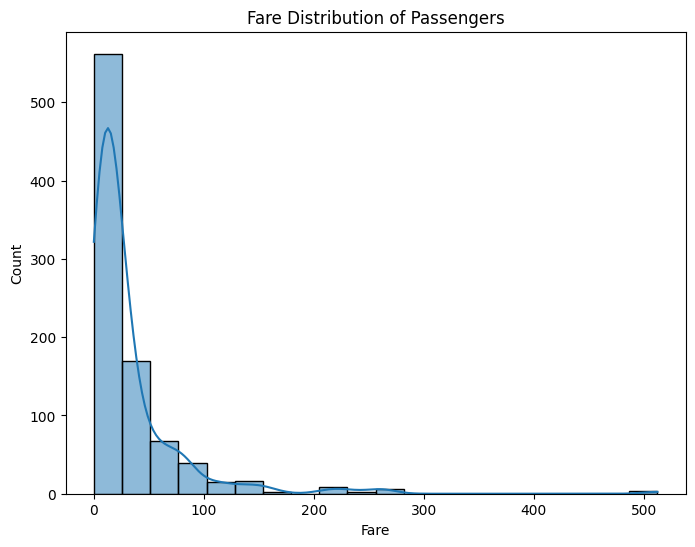


Survival Rate by Family Size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


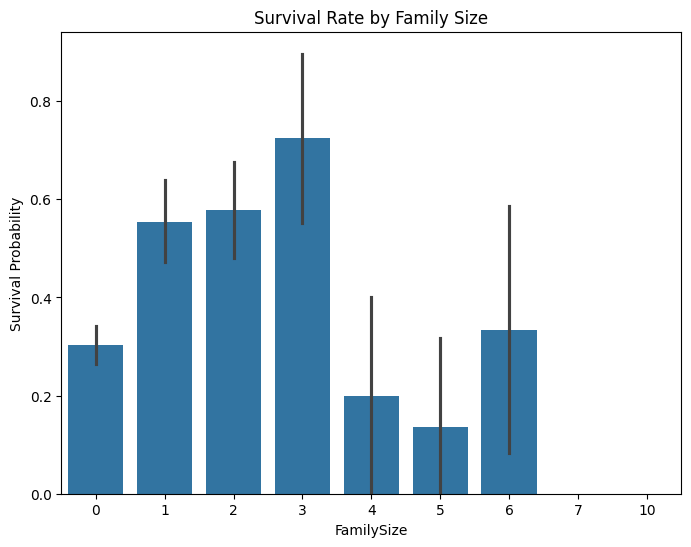

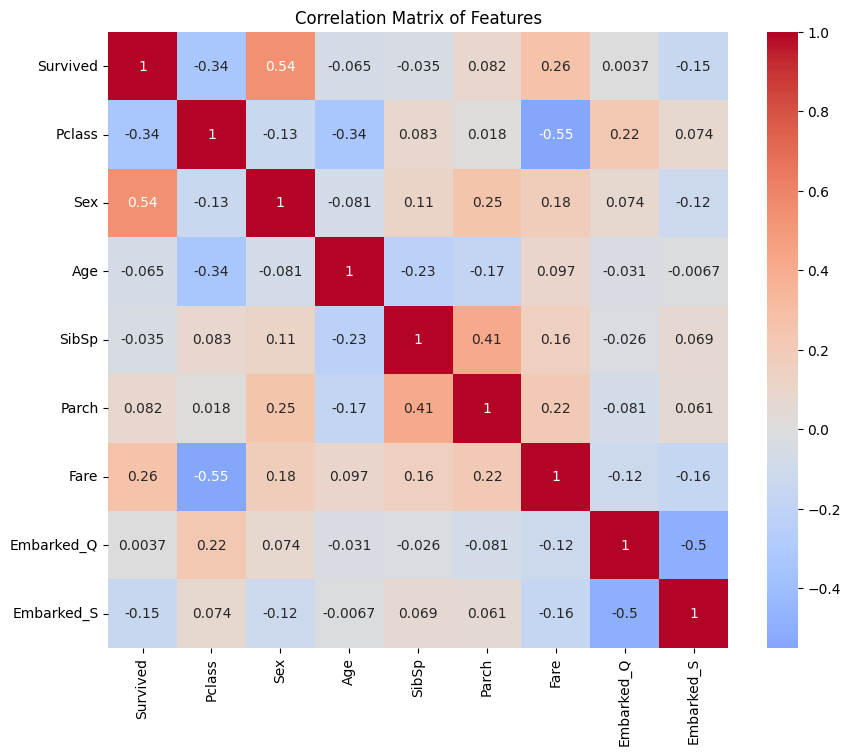

In [21]:

# 1. Summary Statistics for Numerical Columns
print("\nSummary Statistics for Numerical Features:")
print(df[["Age", "Fare", "SibSp", "Parch"]].describe())

# 2. Survival Rate by Categorical Features
# Survival by Pclass
print("\nSurvival Rate by Passenger Class:")
print(df.groupby("Pclass")["Survived"].mean())
plt.figure(figsize=(8, 6))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Probability")
plt.show()

# Survival by Sex
print("\nSurvival Rate by Sex:")
print(df.groupby("Sex")["Survived"].mean())
plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Probability")
plt.show()

# Survival by Embarked
print("\nSurvival Rate by Embarked:")
print(df.groupby("Embarked")["Survived"].mean())
plt.figure(figsize=(8, 6))
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Survival Rate by Embarkation Port")
plt.ylabel("Survival Probability")
plt.show()

# 3. Distribution of Numerical Features
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.show()

# Fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["Fare"], bins=20, kde=True)
plt.title("Fare Distribution of Passengers")
plt.xlabel("Fare")
plt.show()

# 4. Family Size Analysis
df["FamilySize"] = df["SibSp"] + df["Parch"]
print("\nSurvival Rate by Family Size:")
print(df.groupby("FamilySize")["Survived"].mean())
plt.figure(figsize=(8, 6))
sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Probability")
plt.show()

# 5. Correlation Matrix (after encoding categorical variables temporarily)
# Encode Sex and Embarked for correlation
df_temp = df.copy()
df_temp["Sex"] = df_temp["Sex"].map({"male": 0, "female": 1})
df_temp = pd.get_dummies(df_temp, columns=["Embarked"], drop_first=True)
correlation_matrix = df_temp[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_Q", "Embarked_S"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Features")
plt.show()

----

# Feature Encoding

Machine learning models require numerical input.  
We'll convert categorical columns into numbers:
- `Sex`: map 'male' → 0, 'female' → 1
- `Embarked`: convert to dummy/one-hot variables

In [ ]:
# Make a copy of the cleaned dataframe (from Step 3)
df_encoded = df.copy()

# Encode 'Sex' column: male = 0, female = 1
df_encoded["Sex"] = df_encoded["Sex"].map({"male": 0, "female": 1})

# Convert 'Embarked' into dummy variables
df_encoded = pd.get_dummies(df_encoded, columns=["Embarked"], drop_first=True)

# Display first few rows to check encoding
df_encoded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


---

# Train/Test Split

We need to split the data into:
- **Features (X)** → all columns that help predict survival  
- **Target (y)** → the 'Survived' column

Then, we'll split into:
- Training set (80%) → used to train the model  
- Validation set (20%) → used to evaluate model performance

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Features (drop 'Survived' and 'PassengerId')
X = df_encoded.drop(columns=["Survived", "PassengerId"])

# Target
y = df_encoded["Survived"]

In [15]:
# Split into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (712, 8) (712,)
Validation set: (179, 8) (179,)


---

# Model Training (Logistic Regression)

We'll use Logistic Regression, a simple and effective model for binary classification tasks like predicting survival.  

Steps:
- Import LogisticRegression from scikit-learn
- Train the model on the training set
- Make predictions on the validation set

In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

---
# Evaluation

We'll evaluate the model using:
- **Accuracy**: overall percentage of correct predictions  
- **Confusion Matrix**: shows True Positives, True Negatives, False Positives, False Negatives  
- **Classification Report**: precision, recall, f1-score for each class

Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



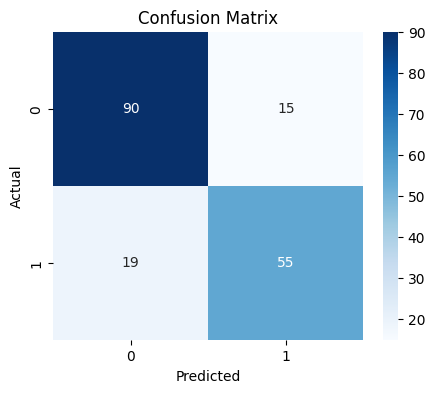

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_val, y_pred)
print("\nClassification Report:\n", cr)

# Optional: visualize confusion matrix with seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

---
# Prediction on Test Set + Submission

Steps:
1. Clean and encode the test dataset exactly like the training set
2. Use the trained model to predict survival
3. Create a CSV file for submission with columns: `PassengerId` and `Survived`

In [19]:
test_df = test.copy()
# Copy the test dataset
test_df_copy = test_df.copy()

# Fill missing Age values with median from training data
test_df_copy["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Fare values with median (if any missing)
test_df_copy["Fare"].fillna(df["Fare"].median(), inplace=True)

# Fill missing Embarked values (just in case)
test_df_copy["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop columns not needed
test_df_copy.drop(columns=["Cabin", "Ticket", "Name"], inplace=True)

# Encode categorical columns
test_df_copy["Sex"] = test_df_copy["Sex"].map({"male": 0, "female": 1})
test_df_copy = pd.get_dummies(test_df_copy, columns=["Embarked"], drop_first=True)

# Align columns with training data (in case any missing dummies)
test_df_copy = test_df_copy.reindex(columns=X_train.columns, fill_value=0)

# Make predictions
test_predictions = model.predict(test_df_copy)

# Prepare submission dataframe
submission_df = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_predictions
})

# Save to CSV
submission_df.to_csv("titanic_submission.csv", index=False)

print(" Submission file created: titanic_submission.csv")

 Submission file created: titanic_submission.csv


/var/folders/f3/ny_qtwdj1cb_cdrm5xqb0w3h0000gn/T/ipykernel_40375/191101824.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_copy["Age"].fillna(df["Age"].median(), inplace=True)
/var/folders/f3/ny_qtwdj1cb_cdrm5xqb0w3h0000gn/T/ipykernel_40375/191101824.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v